## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

In [2]:
#Se utiliza para suprimir las advertencias (warnings) que se generan durante la ejecución de un programa de Python.
import warnings
warnings.filterwarnings("ignore")

## Importing the Data and Pre-processing 

In [4]:
raw_csv_data = pd.read_csv("Index2023.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = False)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [5]:
df_comp['market_value']=df_comp.ftse

In [6]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The LLR Test

In [7]:
#Realizar una prueba de razón de verosimilitud (LLR) entre dos modelos
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(4)
    return p

In [8]:
import warnings
warnings.filterwarnings("ignore")

## Creating Returns

In [9]:
#Calcula el cambio porcentual entre los valores sucesivos en la columna "market_value"
#mul(100): Multiplica el resultado por 100 para expresar la tasa de rendimiento en términos porcentuales.
df['returns'] = df.market_value.pct_change(1)*100

## ACF for Returns

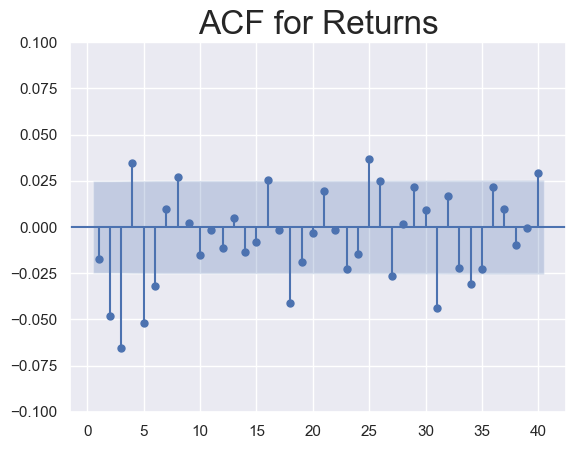

In [10]:
#Gráfico de la función de autocorrelación (ACF)
sgt.plot_acf(df.returns[1:], zero = False, lags = 40)
plt.title("ACF for Returns", size=24)
plt.ylim(-0.1, 0.1) #Limitar el eje y 
plt.show()

## MA(1) for Returns

In [11]:
#En versiones recientes de StatsModels, la clase ARMA se ha eliminado y se recomienda utilizar SARIMAX incluso para modelos ARMA.
#Aquí tienes un ejemplo actualizado de cómo ajustar un modelo ARMA utilizando SARIMAX
import statsmodels.api as sm
model_ret_ma_1 = sm.tsa.SARIMAX(df.returns[1:], order=(0,0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6199
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -9512.604
Date:                Mon, 09 Oct 2023   AIC                          19029.207
Time:                        21:43:18   BIC                          19042.672
Sample:                    01-10-1994   HQIC                         19033.875
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0191      0.007     -2.556      0.011      -0.034      -0.004
sigma2         1.2601      0.011    111.994      0.000       1.238       1.282
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10114.44
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Higher-Lag MA Models for Returns

In [12]:
model_ret_ma_2 = sm.tsa.SARIMAX(df.returns[1:], order=(0,0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_1, model_ret_ma_2)))

#Rechazar la hipótesis nula
#El modelo alternativo (model_ret_ma_2) es preferible al modelo nulo (model_ret_ma_1) en función de la verosimilitud de los datos observados.

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:               SARIMAX(0, 0, 2)   Log Likelihood               -9505.044
Date:                Mon, 09 Oct 2023   AIC                          19016.088
Time:                        21:43:29   BIC                          19036.285
Sample:                    01-10-1994   HQIC                         19023.090
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0249      0.008     -3.286      0.001      -0.040      -0.010
ma.L2         -0.0484      0.007     -6.963      0.000      -0.062      -0.035
sigma2         1.2570      0.011    111.072      0.0

In [13]:
model_ret_ma_3 = sm.tsa.SARIMAX(df.returns[1:], order=(0,0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_2, model_ret_ma_3)))
#Rechazar la hipótesis nula
#El modelo alternativo (model_ret_ma_3) es preferible al modelo nulo (model_ret_ma_2) en función de la verosimilitud de los datos observados.

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:               SARIMAX(0, 0, 3)   Log Likelihood               -9489.044
Date:                Mon, 09 Oct 2023   AIC                          18986.089
Time:                        21:43:35   BIC                          19013.017
Sample:                    01-10-1994   HQIC                         18995.425
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0171      0.008     -2.253      0.024      -0.032      -0.002
ma.L2         -0.0535      0.007     -7.620      0.000      -0.067      -0.040
ma.L3         -0.0745      0.007    -10.876      0.0

In [14]:
model_ret_ma_4 = sm.tsa.SARIMAX(df.returns[1:], order=[0,0,4])
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_3, model_ret_ma_4)))
#Rechazar la hipótesis nula
#El modelo alternativo (model_ret_ma_4) es preferible al modelo nulo (model_ret_ma_3) en función de la verosimilitud de los datos observados.

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:               SARIMAX(0, 0, 4)   Log Likelihood               -9486.017
Date:                Mon, 09 Oct 2023   AIC                          18982.035
Time:                        21:43:43   BIC                          19015.696
Sample:                    01-10-1994   HQIC                         18993.705
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0165      0.008     -2.100      0.036      -0.032      -0.001
ma.L2         -0.0536      0.007     -7.528      0.000      -0.068      -0.040
ma.L3         -0.0756      0.007    -10.877      0.0

In [15]:
model_ret_ma_5 = sm.tsa.SARIMAX(df.returns[1:], order=[0,0,5])
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_4, model_ret_ma_5)))
#Rechazar la hipótesis nula
#El modelo alternativo (model_ret_ma_5) es preferible al modelo nulo (model_ret_ma_4) en función de la verosimilitud de los datos observados.

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:               SARIMAX(0, 0, 5)   Log Likelihood               -9478.476
Date:                Mon, 09 Oct 2023   AIC                          18968.952
Time:                        21:43:52   BIC                          19009.345
Sample:                    01-10-1994   HQIC                         18982.957
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0209      0.008     -2.590      0.010      -0.037      -0.005
ma.L2         -0.0490      0.007     -6.861      0.000      -0.063      -0.035
ma.L3         -0.0700      0.007     -9.903      0.0

In [16]:
model_ret_ma_6 = sm.tsa.SARIMAX(df.returns[1:], order=[0,0,6])
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_5, model_ret_ma_6)))
#Rechazar la hipótesis nula
#El modelo alternativo (model_ret_ma_6) es preferible al modelo nulo (model_ret_ma_5) en función de la verosimilitud de los datos observados.

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:               SARIMAX(0, 0, 6)   Log Likelihood               -9475.878
Date:                Mon, 09 Oct 2023   AIC                          18965.755
Time:                        21:44:00   BIC                          19012.880
Sample:                    01-10-1994   HQIC                         18982.093
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0190      0.008     -2.354      0.019      -0.035      -0.003
ma.L2         -0.0484      0.007     -6.733      0.000      -0.062      -0.034
ma.L3         -0.0682      0.007     -9.608      0.0

In [17]:
model_ret_ma_7 = sm.tsa.SARIMAX(df.returns[1:], order=[0,0,7])
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_6, model_ret_ma_7)))

#No hay evidencia estadística para rechazar la hipótesis nula
#Ambos modelos (model_ret_ma_6 y model_ret_ma_7) tienen un rendimiento similar en términos de ajuste a los datos observados 
#y que no hay suficiente evidencia para preferir uno sobre el otro en función de la verosimilitud

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:               SARIMAX(0, 0, 7)   Log Likelihood               -9475.686
Date:                Mon, 09 Oct 2023   AIC                          18967.371
Time:                        21:46:04   BIC                          19021.228
Sample:                    01-10-1994   HQIC                         18986.043
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0196      0.008     -2.417      0.016      -0.036      -0.004
ma.L2         -0.0487      0.007     -6.766      0.000      -0.063      -0.035
ma.L3         -0.0677      0.007     -9.405      0.0

In [18]:
model_ret_ma_8 = sm.tsa.SARIMAX(df.returns[1:], order=[0,0,8])
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_7, model_ret_ma_8)))

#Rechazar la hipótesis nula
#El modelo alternativo (model_ret_ma_8) es preferible al modelo nulo (model_ret_ma_7) en función de la verosimilitud de los datos observados.

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:               SARIMAX(0, 0, 8)   Log Likelihood               -9473.549
Date:                Mon, 09 Oct 2023   AIC                          18965.099
Time:                        21:46:12   BIC                          19025.688
Sample:                    01-10-1994   HQIC                         18986.105
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0193      0.008     -2.347      0.019      -0.035      -0.003
ma.L2         -0.0488      0.007     -6.747      0.000      -0.063      -0.035
ma.L3         -0.0691      0.007     -9.605      0.0

In [20]:
LLR_test(model_ret_ma_6, model_ret_ma_8, DF = 2)
#No hay evidencia estadística para rechazar la hipótesis nula
#Ambos modelos (model_ret_ma_6 y model_ret_ma_8) tienen un rendimiento similar en términos de ajuste a los datos observados 
#y que no hay suficiente evidencia para preferir uno sobre el otro en función de la verosimilitud

0.0975

## Residuals for Returns

In [21]:
#Agregando una nueva columna llamada "res_ret_ma_8" al df. Esta columna contendrá los residuos del modelo results_ret_ma_8, 
#que son las diferencias entre los valores reales de la serie temporal y las predicciones del modelo.
df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]

In [22]:
#Calcula la media de los valores en la columna res_ret_ma_8.
#Calcula la varianza de los valores en la columna res_ret_ma_8.

print("La media de los residuos es: " + str(round(df.res_ret_ma_8.mean(),3)) + "\nLa varianza de los residuos es: " + str(round(df.res_ret_ma_8.var(),3)))

La media de los residuos es: 0.022
La varianza de los residuos es: 1.244


In [23]:
#Calcula la desviación estándar de la serie de retornos residuales
#round(..., 3): Redondea el resultado de la desviación estándar a tres decimales.
round(sqrt(df.res_ret_ma_8.var()),3)

1.115

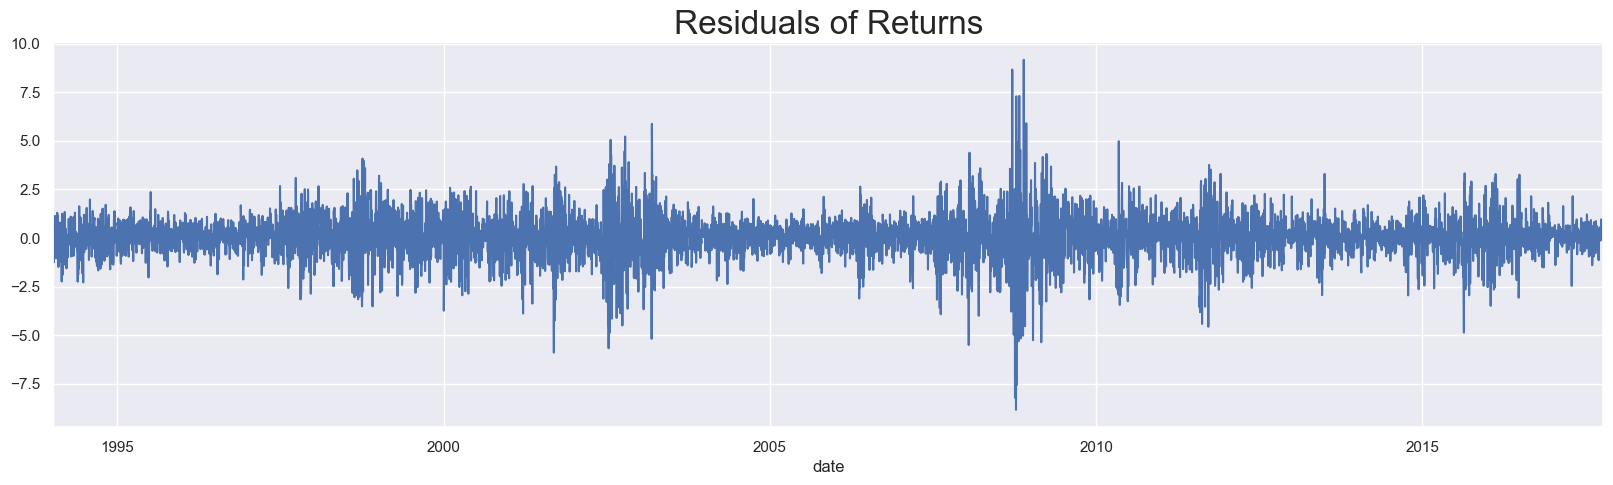

In [24]:
#Gráfico de la serie de tiempo de los residuos
#[1:] se utiliza para excluir el primer valor de los residuos
df.res_ret_ma_8[1:].plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 24)
plt.show()

In [25]:
#Prueba de Dickey-Fuller aumentada (ADF) de df.res_ret_ma_8 después de excluir las dos primeras observaciones
sts.adfuller(df.res_ret_ma_8[2:])
#Ho = Raiz unitaria (No es estacionario)
#Ha = No hay raiz unitaria (Es estacionario)

(-78.74888787222062,
 0.0,
 0,
 6197,
 {'1%': -3.431405673841931,
  '5%': -2.862006513518873,
  '10%': -2.567018322298507},
 18853.31889790371)

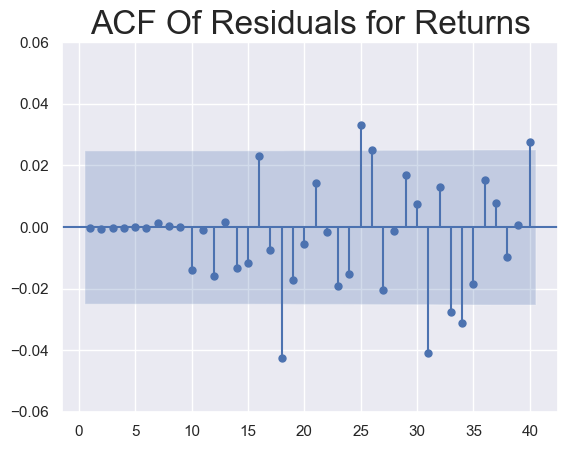

In [26]:
#Gráfico de la función de autocorrelación (ACF)
sgt.plot_acf(df.res_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.ylim(-0.06, 0.06) #Limitar el eje y 
plt.show()

## Normalized Returns

In [27]:
#Asigna el valor del primer elemento de la columna returns
bench_ret = df.returns.iloc[1] 
#div(benchmark): Divide cada valor en la columna "market_value" por el valor de referencia benchmark
df['norm_ret'] = df.returns.div(bench_ret).mul(100) 

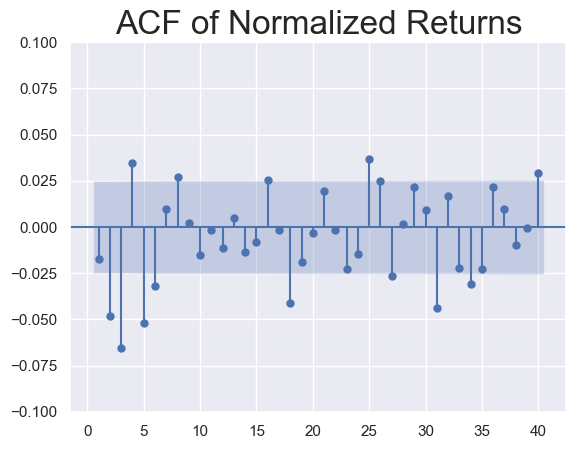

In [28]:
#Gráfico de la función de autocorrelación (ACF)
sgt.plot_acf(df.norm_ret[1:], zero = False, lags = 40)
plt.title("ACF of Normalized Returns",size=24)
plt.ylim(-0.1, 0.1) #Limitar el eje y 
plt.show()

In [29]:
model_norm_ret_ma_8 = sm.tsa.SARIMAX(df.norm_ret[1:], order=(0,0,8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
results_norm_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 6199
Model:               SARIMAX(0, 0, 8)   Log Likelihood              -49510.239
Date:                Mon, 09 Oct 2023   AIC                          99038.478
Time:                        21:47:36   BIC                          99099.067
Sample:                    01-10-1994   HQIC                         99059.484
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0193      0.008     -2.341      0.019      -0.035      -0.003
ma.L2         -0.0488      0.007     -6.729      0.000      -0.063      -0.035
ma.L3         -0.0691      0.007     -9.579      0.000      -0.083      -0.055
ma.L4          0.0328      0.008      4.274      0.000       0.018       0.048
ma.L5         -0.0519      0.007     -7.101      0.000      -0.066      -0.038
ma.L6         -0.0304      0.008     -3.781      0.000      -0.046      -0.015
ma.L7          0.0080      0.008      1.010      0.312      -0.008       0.024
ma.L8          0.0258      0.008      3.088      0.002       0.009       0.042
sigma2      5.081e+05   4932.522    103.012      0.000    4.98e+05    5.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8504.39
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
df['res_norm_ret_ma_8'] = results_ret_ma_8.resid[1:] #excluir el primer valor

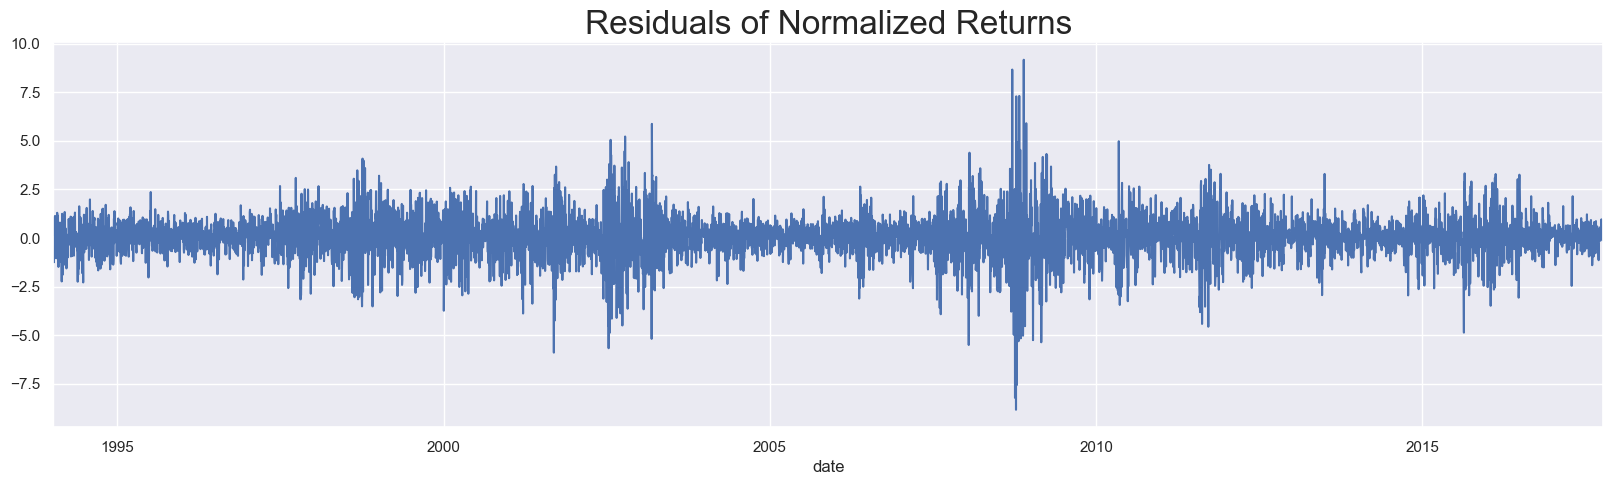

In [31]:
#Gráfico de la serie de tiempo de los residuos normalizados 
#[1:] se utiliza para excluir el primer valor de los residuos
df.res_norm_ret_ma_8[1:].plot(figsize=(20,5))
plt.title("Residuals of Normalized Returns",size=24)
plt.show()

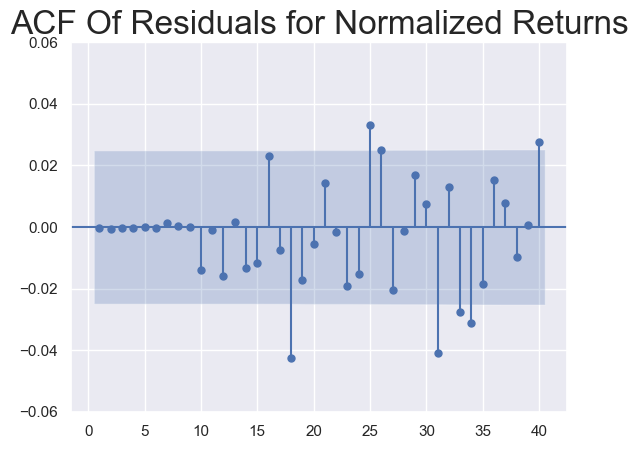

In [32]:
#Calculará la ACF de los residuos normalizados
#zero=False: Utiliza para excluir el retraso cero en el gráfico de ACF
#lags=40: Determina hasta qué retraso se calculará la ACF y se mostrará en el gráfica
sgt.plot_acf(df.res_norm_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Normalized Returns",size=24)
plt.ylim(-0.06, 0.06) #Limitar el eje y 
plt.show()

## MA Models For Prices

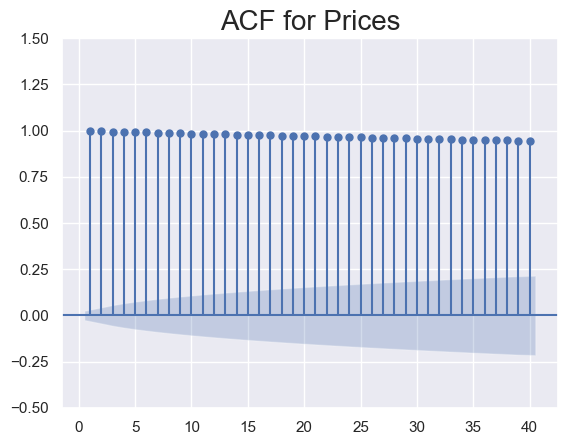

In [33]:
#Calculará la ACF de "market_values"
#zero=False: Utiliza para excluir el retraso cero en el gráfico de ACF
#lags=40: Determina hasta qué retraso se calculará la ACF y se mostrará en el gráfica
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size=20)
plt.ylim(-0.5, 1.5) #Limitar el eje y 
plt.show()

In [34]:
model_ma_1 = sm.tsa.SARIMAX(df.market_value, order=(0,0,1))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6200
Model:               SARIMAX(0, 0, 1)   Log Likelihood              -58342.368
Date:                Mon, 09 Oct 2023   AIC                         116688.736
Time:                        21:47:59   BIC                         116702.201
Sample:                    01-07-1994   HQIC                        116693.404
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.0000      0.002    634.989      0.000       0.997       1.003
sigma2      8.852e+06    7.1e-12   1.25e+18      0.000    8.85e+06    8.85e+06
===================================================================================
Ljung-Box (L1) (Q):                1915.58   Jarque-Bera (JB):               208.17
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.94   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.11e+32. Standard errors may be unstable.
"""